# Car Insurance Kaggle

Applying Generalized Linear Models


# 1)- Importing key libraries 

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
import h2o
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib, sys,h2o

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
pandas 0.24.1
numpy 1.16.0
seaborn 0.9.0
matplotlib 3.0.2
sys The 'sys' distribution was not found and is required by the application
h2o 3.26.0.3
Sun Aug 25 21:46:26 2019 W. Europe Daylight Time

# 2)- Loading data

In [6]:
df_insurance=pd.read_csv('SwedishMotorInsurance.csv')

In [7]:
df_insurance.shape

(2182, 7)

In [8]:
df_insurance.columns

Index(['Kilometres', 'Zone', 'Bonus', 'Make', 'Insured', 'Claims', 'Payment'], dtype='object')

In [9]:
df_insurance.head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


# 3)- Exploring data

In [10]:
df_insurance.tail()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
2177,5,7,7,5,8.74,0,0
2178,5,7,7,6,16.61,0,0
2179,5,7,7,7,2.83,1,966
2180,5,7,7,8,13.06,0,0
2181,5,7,7,9,384.87,16,112252


In [11]:
type(df_insurance)

pandas.core.frame.DataFrame

In [12]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
Kilometres    2182 non-null int64
Zone          2182 non-null int64
Bonus         2182 non-null int64
Make          2182 non-null int64
Insured       2182 non-null float64
Claims        2182 non-null int64
Payment       2182 non-null int64
dtypes: float64(1), int64(6)
memory usage: 119.4 KB


In [13]:
df_insurance.describe()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2.182000e+03
mean,2.985793,3.970211,4.015124,4.991751,1092.195270,51.865720,2.570076e+05
std,1.410409,1.988858,2.000516,2.586943,5661.156245,201.710694,1.017283e+06
min,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000e+00
25%,2.000000,2.000000,2.000000,3.000000,21.610000,1.000000,2.988750e+03
50%,3.000000,4.000000,4.000000,5.000000,81.525000,5.000000,2.740350e+04
75%,4.000000,6.000000,6.000000,7.000000,389.782500,21.000000,1.119538e+05
max,5.000000,7.000000,7.000000,9.000000,127687.270000,3338.000000,1.824503e+07


### 3.1)-Dependant feature

In [14]:
df_insurance['Claims'].head()

0    108
1     19
2     13
3    124
4     40
Name: Claims, dtype: int64

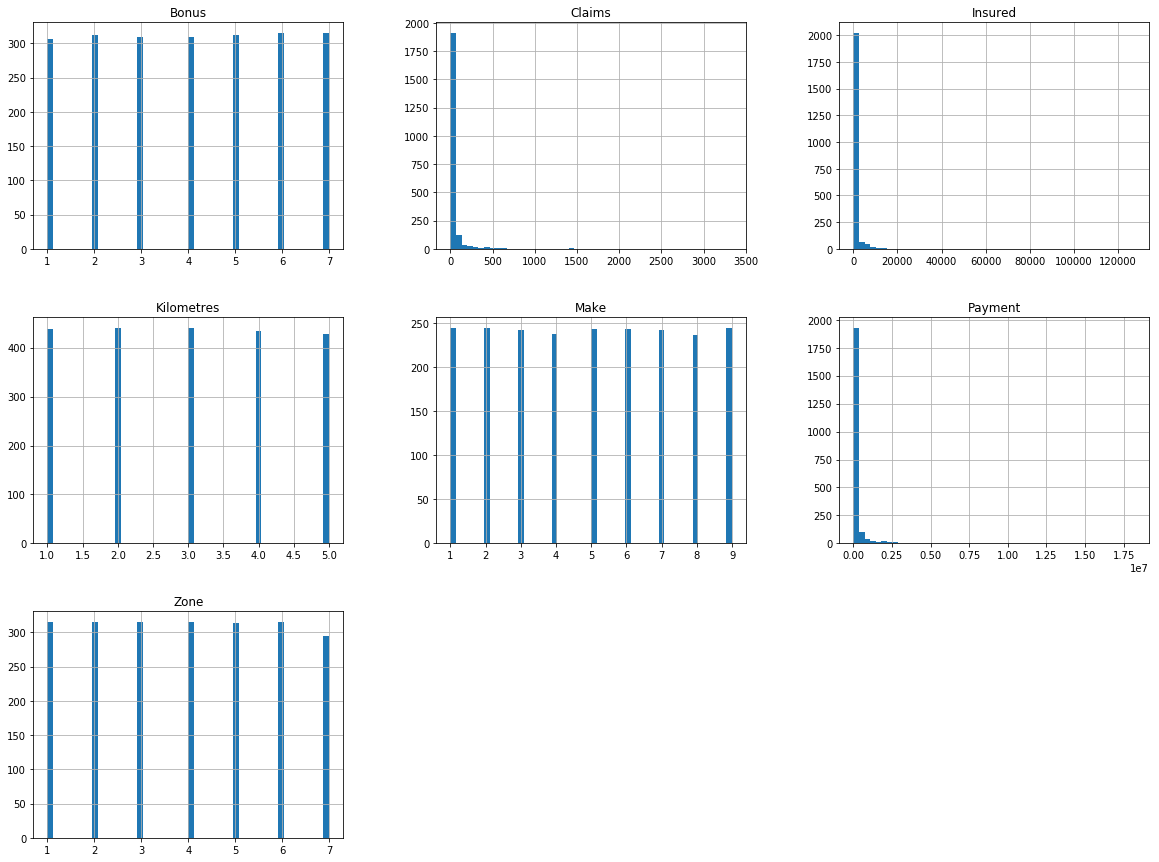

In [15]:
# Distribution of Features
df_insurance.hist(bins=50, figsize=(20,15))
plt.show()

From desribe and histogram, there is a possibility of outliers. If it is then we need to detect those values

### 3.2)-Missing values

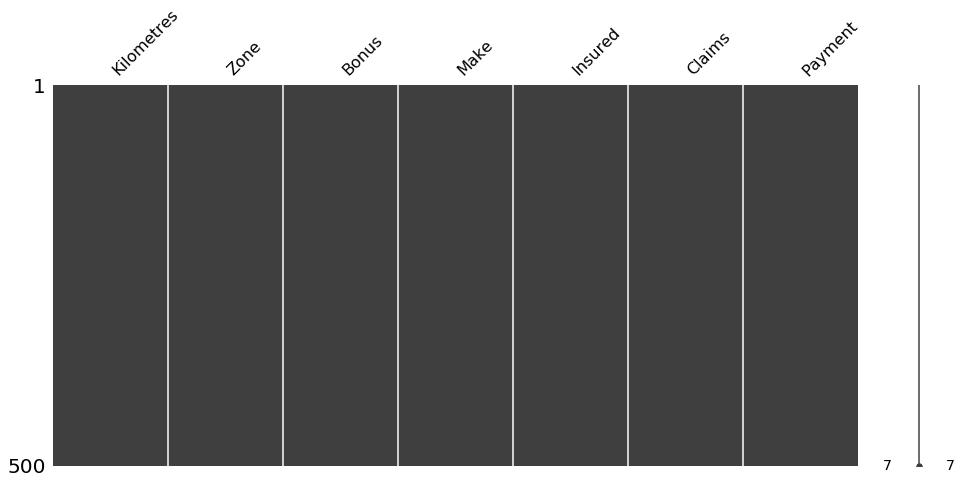

In [16]:
import missingno as msno

msno.matrix(df_insurance.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

In [17]:
df_insurance.isnull().sum()

Kilometres    0
Zone          0
Bonus         0
Make          0
Insured       0
Claims        0
Payment       0
dtype: int64

So, there is no missing value

### 3.3)- Duplicate values

In [18]:
df_insurance.duplicated().sum()

0

### 3.4)-Sorting

In [19]:
df_insurance.sort_values(by='Claims', ascending=False).head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
690,2,4,7,9,121293.07,3338,18245026
251,1,4,7,9,127687.27,2894,15540162
1131,3,4,7,9,79614.96,2548,13203616
501,2,1,7,9,44511.41,2127,10315455
564,2,2,7,9,54421.40,2087,9950131


In [20]:
df_insurance.sort_values(by=['Claims', 'Insured'], ascending=[True, False]).head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
361,1,6,6,2,88.23,0,0
793,2,6,5,4,77.26,0,0
434,1,7,7,5,60.68,0,0
1856,5,2,5,3,56.86,0,0
1668,4,6,4,6,56.73,0,0


### 3.5)- Correlation

In [21]:
data_corrs = df_insurance.corr()

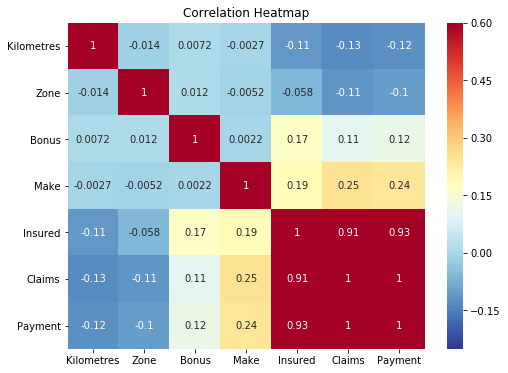

In [22]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [23]:
#correlations with the label feature and sort
correlations = df_insurance.corr()['Claims'].sort_values()

In [24]:
print('Most Positive Correlations:\n', correlations.tail(5))

Most Positive Correlations:
 Bonus      0.105102
Make       0.253212
Insured    0.910348
Payment    0.995400
Claims     1.000000
Name: Claims, dtype: float64


In [25]:
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Negative Correlations:
 Kilometres   -0.128452
Zone         -0.114687
Bonus         0.105102
Make          0.253212
Insured       0.910348
Name: Claims, dtype: float64


### 3.6)- Outliers

In [26]:
df_insurance['Claims'].max()

3338

In [27]:
df_insurance['Claims'].min()

0

In [28]:
df_insurance['Claims'].mean()

51.86571952337305

In [29]:
df_insurance['Claims'].std()

201.71069351186725

We can see higher and lower values. Huge difference in std deviation and mean so, there is possibility of outliers. Let's confirm it !!!

In [30]:
df_insurance[(df_insurance['Claims'] > 3000)].count()

Kilometres    1
Zone          1
Bonus         1
Make          1
Insured       1
Claims        1
Payment       1
dtype: int64

In [31]:
df_insurance[(df_insurance['Claims'] > 2000)].count()

Kilometres    6
Zone          6
Bonus         6
Make          6
Insured       6
Claims        6
Payment       6
dtype: int64

In [32]:
df_insurance[(df_insurance['Claims'] > 1000)].count()

Kilometres    22
Zone          22
Bonus         22
Make          22
Insured       22
Claims        22
Payment       22
dtype: int64

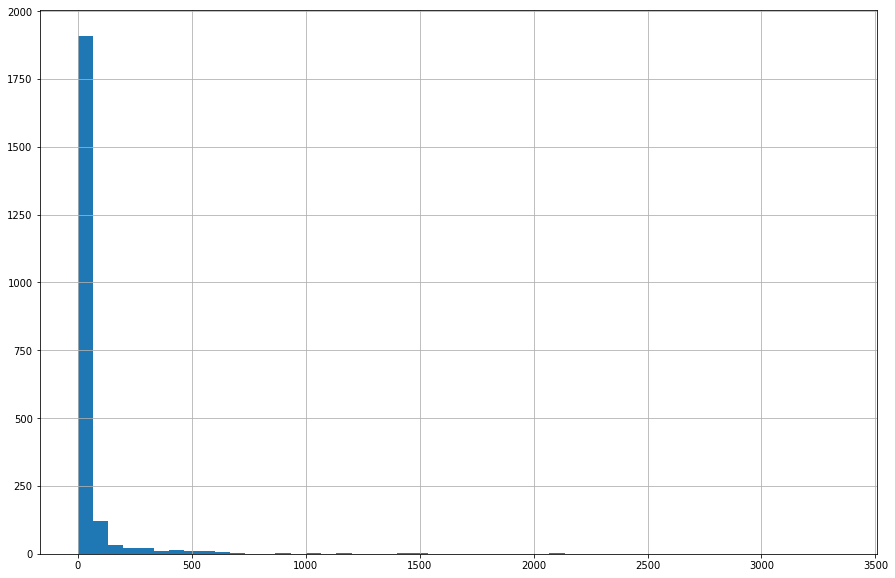

In [33]:
df_insurance.Claims.hist(bins=50,figsize=(15,10))

Claims' value are skewed


 mu = 51.87 and sigma = 201.66



Text(0.5, 1.0, 'Insurance Claims distribution')

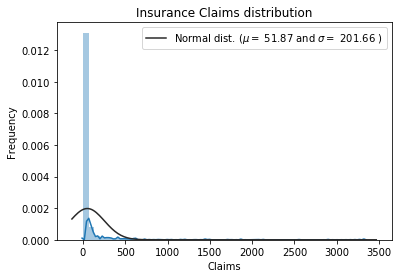

In [34]:
from scipy.stats import norm, skew
sns.distplot(df_insurance['Claims'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_insurance['Claims'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Insurance Claims distribution')

### 3.7)- Density plot for claim frequencies

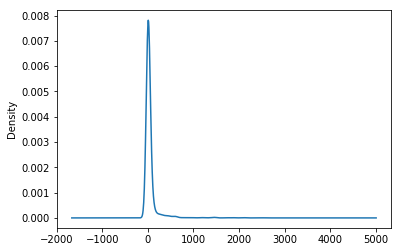

In [35]:
df_insurance.Claims.plot(kind='density')

### 3.8)-Boxplot

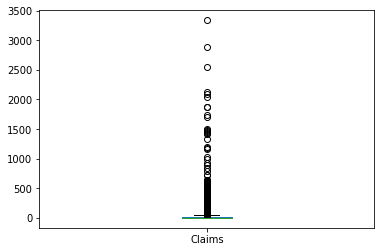

In [36]:
df_insurance.Claims.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

These above points are outliers. So, finally we got visual evidences

### 3.9)-Scatter plot

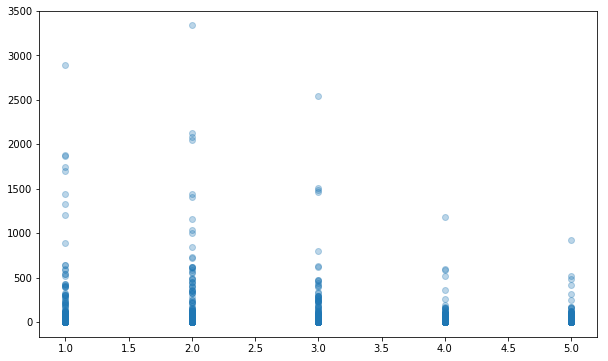

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y=df_insurance['Claims'],x=df_insurance['Kilometres'],alpha=0.3)

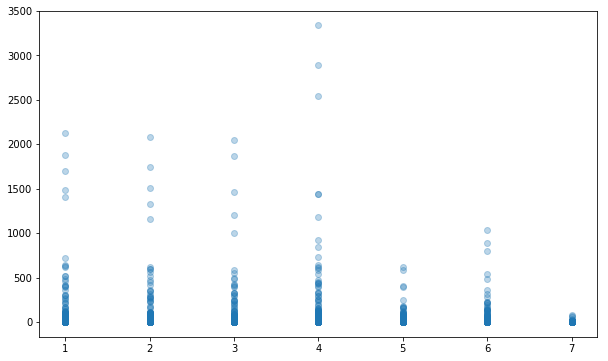

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(y=df_insurance['Claims'],x=df_insurance['Zone'],alpha=0.3)

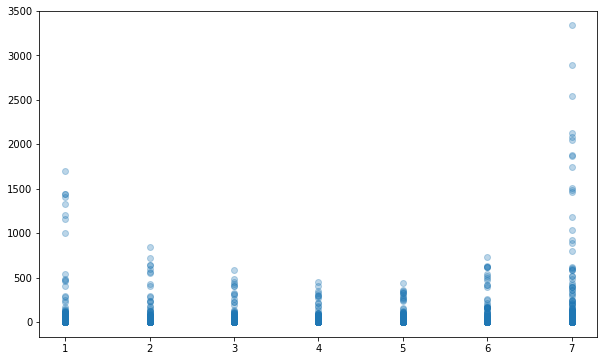

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(y=df_insurance['Claims'],x=df_insurance['Bonus'],alpha=0.3)

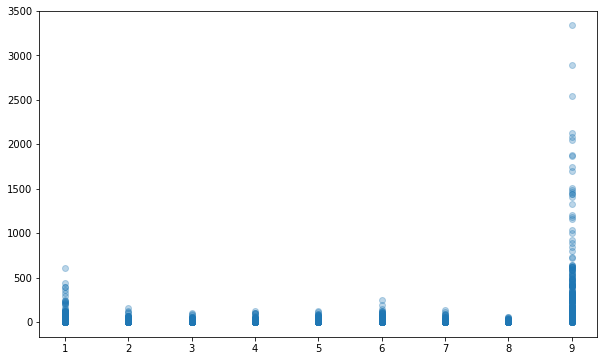

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y=df_insurance['Claims'],x=df_insurance['Make'],alpha=0.3)

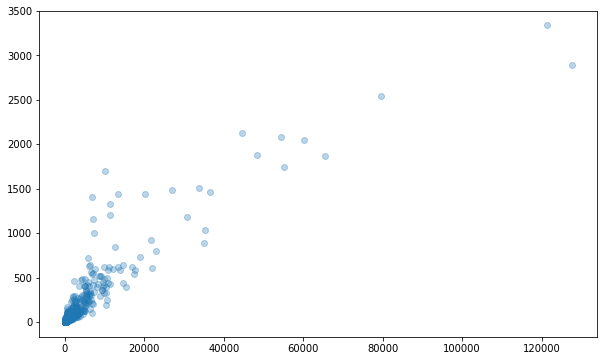

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y=df_insurance['Claims'],x=df_insurance['Insured'],alpha=0.3)

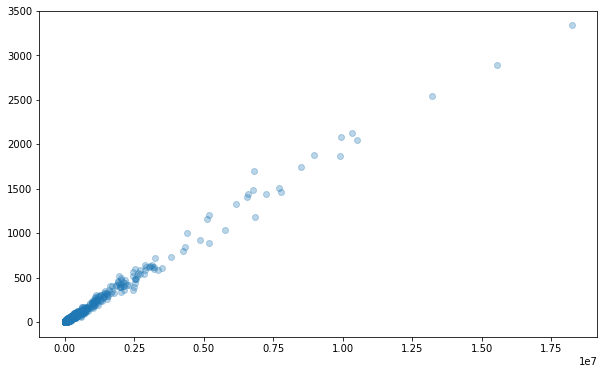

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(y=df_insurance['Claims'],x=df_insurance['Payment'],alpha=0.3)

"Insured" and "Payment" are showing a linear pattern.

### 3.10)- Plot Claim Frequencies

boxplot

In [43]:
df_insurance['av_claims']= (df_insurance['Claims']/df_insurance['Insured'])

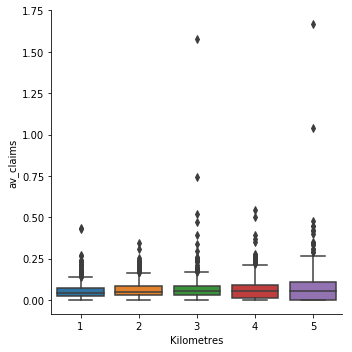

In [44]:
sns.catplot(x="Kilometres", y="av_claims", kind="box", data=df_insurance);

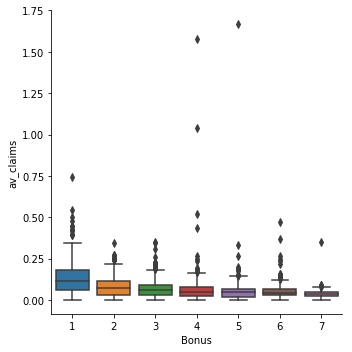

In [45]:
sns.catplot(x="Bonus", y="av_claims", kind="box", data=df_insurance);

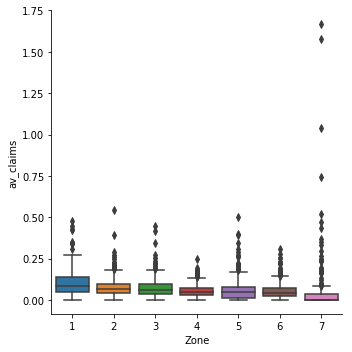

In [46]:
sns.catplot(x="Zone", y="av_claims", kind="box", data=df_insurance);

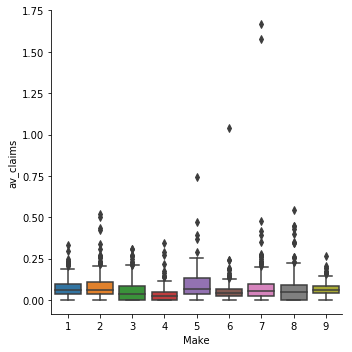

In [47]:
sns.catplot(x="Make", y="av_claims", kind="box", data=df_insurance);

### 3.11)-Tukey IQR

For outlier problem

In [48]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [49]:
tukey_indices, tukey_values = find_outliers_tukey(df_insurance['Claims'])
print(np.sort(tukey_values))

[  52   52   52   52   52   53   53   53   53   53   53   54   54   55
   55   55   55   55   55   55   55   56   56   57   57   58   58   58
   59   60   60   60   60   61   61   62   62   62   63   64   64   64
   65   65   65   65   65   65   65   65   66   66   67   67   67   67
   67   68   68   69   69   70   70   70   70   71   71   72   72   72
   72   73   74   74   74   74   74   74   75   76   76   77   77   78
   80   80   81   82   82   82   82   83   83   83   83   84   85   86
   86   86   86   86   86   87   87   87   87   88   89   89   90   91
   91   91   91   92   92   94   95   95   96   96   97   97   98   98
   98   98   99   99   99   99   99   99  100  101  101  101  101  103
  104  105  107  107  107  107  108  109  111  111  112  113  113  115
  115  115  115  116  116  117  118  119  120  120  121  121  122  122
  122  124  125  125  127  131  135  136  138  139  140  144  146  148
  150  153  154  156  156  157  159  160  162  164  165  172  172  173
  174 

### 3.12)-Treating Outlier problem
If we want to treat these outliers then feature scaling is the way. There are 4 methods of feature scaling that are implemented in scikit-learn:

- StandardScaler
- MinMaxScaler
- RobustScaler
- Normalizer

In [50]:
# Log Transformation of the Target Variable
df_insurance["Claims"]=np.log1p(df_insurance["Claims"])

### 3.13)-Probability plot or QQ plot

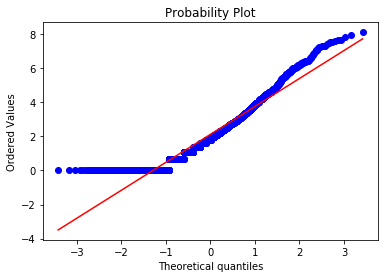

In [51]:
fig = plt.figure()
res = stats.probplot(df_insurance['Claims'], plot=plt)
plt.show()

# 4)- Poisson Model

In [52]:
y = df_insurance.Claims.values
x = df_insurance.drop('Claims', 1)

In [53]:
type(x)

pandas.core.frame.DataFrame

In [54]:
# adding constant to adding bias
X = sm.add_constant(x, prepend=False)

In [55]:
type(x)

pandas.core.frame.DataFrame

In [56]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(x)
X_scaled

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.40827845, -1.49376798, -1.50751861, ..., -0.11255851,
         0.13321216,  1.96478594],
       [-1.40827845, -1.49376798, -1.50751861, ..., -0.18075102,
        -0.20725309,  2.40167423],
       [-1.40827845, -1.49376798, -1.50751861, ..., -0.18009553,
        -0.23726835,  1.2763475 ],
       ...,
       [ 1.42842921,  1.52373092,  1.49239531, ..., -0.19247216,
        -0.25174945,  3.32090194],
       [ 1.42842921,  1.52373092,  1.49239531, ..., -0.1906647 ,
        -0.25269926, -0.80786303],
       [ 1.42842921,  1.52373092,  1.49239531, ..., -0.12497225,
        -0.14232901, -0.32211335]])

### 4.1)- building the model


In [57]:
poisson_mod = sm.Poisson(y, x)

In [58]:
poisson_res = poisson_mod.fit(family = " poisson")
print(poisson_res.summary())

Optimization terminated successfully.
         Current function value: 1.661465
         Iterations 14
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                 2182
Model:                        Poisson   Df Residuals:                     2175
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.1134
Time:                        21:47:18   Log-Likelihood:                -3625.3
converged:                       True   LL-Null:                       -4088.8
                                        LLR p-value:                5.357e-197
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Kilometres    -0.0708      0.010     -7.060      0.000      -0.090      -0.051
Zone          -0.0731      0

### 4.2)-testing the model

In [59]:
predVals = poisson_res.predict(x)

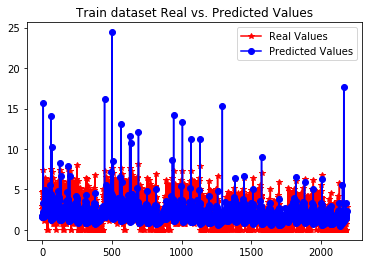

In [60]:
plt.plot(range(len(y)), y, 'r*-', range(len(y)), predVals, 'bo-')
plt.title('Train dataset Real vs. Predicted Values')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Using h2o library for modeling

initiate h2o

In [61]:
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\Hassan\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Hassan\AppData\Local\Temp\tmpgw1pyekt
  JVM stdout: C:\Users\Hassan\AppData\Local\Temp\tmpgw1pyekt\h2o_Hassan_started_from_python.out
  JVM stderr: C:\Users\Hassan\AppData\Local\Temp\tmpgw1pyekt\h2o_Hassan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_Hassan_qkxkt6
H2O cluster total nodes:,1
H2O cluster free memory:,3.542 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


# 5)-Buidling Poisson Model

A type of GLM. Also known as Count model

In [62]:
insurance = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/Motor_insurance_sweden.txt", sep = '\t')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
insurance.head()

Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
1,1,1,1,455.13,108,392491
1,1,1,2,69.17,19,46221
1,1,1,3,72.88,13,15694
1,1,1,4,1292.39,124,422201
1,1,1,5,191.01,40,119373
1,1,1,6,477.66,57,170913
1,1,1,7,105.58,23,56940
1,1,1,8,32.55,14,77487
1,1,1,9,9998.46,1704,6.80599e+06
1,1,2,1,314.58,45,214011


In [64]:
insurance.summary()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
type,int,int,int,int,real,int,int
mins,1.0,1.0,1.0,1.0,0.01,0.0,0.0
mean,2.9857928505957827,3.9702108157653533,4.01512373968836,4.991750687442713,1092.1952703941352,51.865719523372995,257007.6448212649
maxs,5.0,7.0,7.0,9.0,127687.27,3338.0,18245026.0
sigma,1.4104086085546428,1.988857510408954,2.0005158569701793,2.5869431535278427,5661.156244715404,201.7106935118666,1017282.5856477643
zeros,0,0,0,0,0,385,385
missing,0,0,0,0,0,0,0
0,1.0,1.0,1.0,1.0,455.13,108.0,392491.0
1,1.0,1.0,1.0,2.0,69.17,19.0,46221.0
2,1.0,1.0,1.0,3.0,72.88,13.0,15694.0


### 5.1)- Training

In [65]:
poisson_model = H2OGeneralizedLinearEstimator(family = " poisson",lambda_ = 0, remove_collinear_columns= True,compute_p_values=True)
poisson_model.train(y= "Claims" , x = ["Payment", "Insured", "Kilometres", "Zone", "Bonus", "Make"] ,training_frame = insurance)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [66]:
print(poisson_model)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566762621694_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,poisson,log,None,6,6,6,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 18287.328901692104
RMSE: 135.23065074786894
MAE: 40.41030288136362
RMSLE: 1.7658170521996852
R^2: 0.55033248798047
Mean Residual Deviance: 53.17217585124376
Null degrees of freedom: 2181
Residual degrees of freedom: 2175
Null deviance: 435505.0456453899
Residual deviance: 116021.68770741388
AIC: 123673.42803356209

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 21:50:39,0.000 sec,0,435505.045645,199.589847
1,,2019-08-25 21:50:39,0.063 sec,1,210276.874695,96.368870
2,,2019-08-25 21:50:39,0.063 sec,2,134559.405037,61.667922
3,,2019-08-25 21:50:39,0.063 sec,3,116149.265044,53.230644
4,,2019-08-25 21:50:39,0.078 sec,4,116021.815340,53.172234
5,,2019-08-25 21:50:39,0.078 sec,5,116021.687708,53.172176
6,,2019-08-25 21:50:39,0.094 sec,6,116021.687707,53.172176


### 5.2)-Results

In [67]:
# Coefficients that can be applied to the non-standardized data.
print(poisson_model.coef())

{'Intercept': 2.5822368526491166, 'Kilometres': -0.24677600908636968, 'Zone': -0.11876052909495259, 'Bonus': 0.13082512307229846, 'Make': 0.23191707139739182, 'Insured': -5.4928746201778095e-05, 'Payment': 5.931233707518411e-07}


In [68]:
# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(poisson_model.coef_norm())

{'Intercept': 3.1493060536896644, 'Kilometres': -0.34805500760017394, 'Zone': -0.23619777023063776, 'Bonus': 0.2617177331962081, 'Make': 0.5999562800377105, 'Insured': -0.31096021457458406, 'Payment': 0.6033740762065506}


In [69]:
# Print the Coefficients table
poisson_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,2.582237e+00,1.604723e-02,160.914793,0.0,3.149306
1,Kilometres,-2.467760e-01,2.602166e-03,-94.834829,0.0,-0.348055
2,Zone,-1.187605e-01,1.829220e-03,-64.924142,0.0,-0.236198
3,Bonus,1.308251e-01,1.598831e-03,81.825491,0.0,0.261718
4,Make,2.319171e-01,1.655148e-03,140.118597,0.0,0.599956
5,Insured,-5.492875e-05,3.562449e-07,-154.188166,0.0,-0.310960
6,Payment,5.931234e-07,2.280965e-09,260.031722,0.0,0.603374


# 6)-Quantities of interest

### 6a)-Standard error

In [70]:
# Print the Standard error
print(poisson_model._model_json['output']['coefficients_table']['std_error'])

[0.016047231002516732, 0.002602166435357356, 0.001829219855678322, 0.0015988308907284264, 0.001655148398401047, 3.562448896838998e-07, 2.28096543615261e-09]


### 6b)-p values

In [71]:
# Print the p values
print(poisson_model._model_json['output']['coefficients_table']['p_value'])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### 6c)-z values

In [72]:
# Print the z values
print(poisson_model._model_json['output']['coefficients_table']['z_value'])

[160.91479285392833, -94.8348290613778, -64.92414169149346, 81.82549125798703, 140.11859699192826, -154.1881660408294, 260.0317222484022]


### 6d)-graphical plot

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


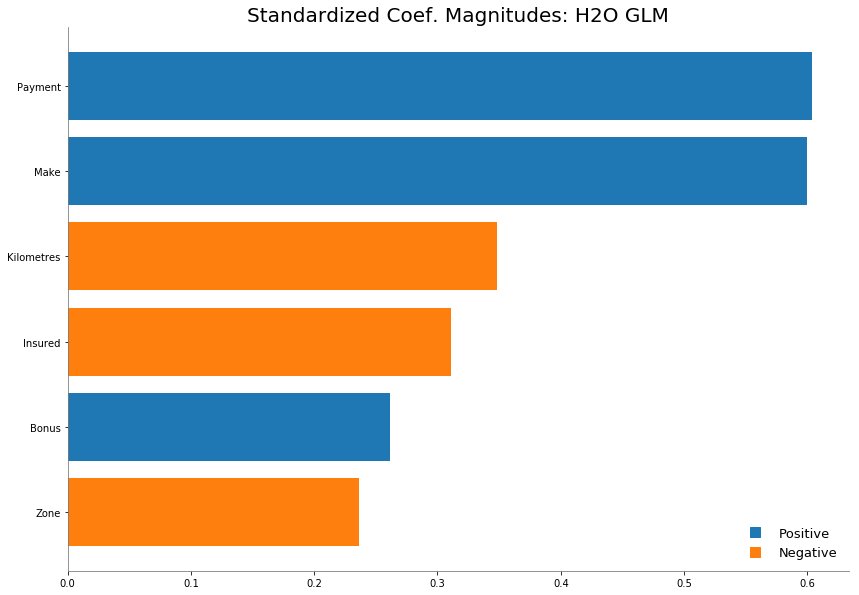

In [73]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
poisson_model.std_coef_plot()